<a href="https://colab.research.google.com/github/sichan0107/Data_Analysis/blob/master/ozone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from google.colab import files
uploaded = files.upload()

Saving 2019VOCsNOx.csv to 2019VOCsNOx.csv
Saving 2020VOCsNOx.csv to 2020VOCsNOx.csv


In [27]:
# 데이터 불러오기 
import io
import pandas as pd

#df_air_2019 = pd.read_csv(io.StringIO(uploaded['2019VOCsNOx.csv'].decode('utf-8')))
df_vocs_2019 = pd.read_csv(io.StringIO(uploaded['2019VOCsNOx.csv'].decode('utf-8')))

#df_air_2020 = pd.read_csv(io.StringIO(uploaded['airquality_2020.csv'].decode('utf-8')))
df_vocs_2020 = pd.read_csv(io.StringIO(uploaded['2020VOCsNOx.csv'].decode('utf-8')))


# df_air = pd.read_csv(uploaded['airquality_2012.csv'])
# df_vocs = pd.read_csv(uploaded['VOC2019.csv'])

In [28]:
print(df_vocs_2019)
print('==========================')
print(df_vocs_2020)

     월  O3(ppm)  Nox(ppb)  VOCx(ppb)
0    1    0.012     0.075       32.9
1    2    0.018     0.057       34.1
2    3    0.028     0.045       32.0
3    4    0.029     0.039       25.9
4    5    0.043     0.033       26.8
5    6    0.039     0.025       20.6
6    7    0.031     0.023       20.3
7    8    0.030     0.024       25.7
8    9    0.024     0.028       32.2
9   10    0.021     0.036       32.3
10  11    0.013     0.063       41.7
11  12    0.011     0.062       35.3
     월  O3(ppm)  Nox(ppb)  VOCx(ppb)
0    1    0.014     0.056       38.2
1    2    0.018     0.050       33.3
2    3    0.027     0.037       26.1
3    4    0.036     0.025       18.8
4    5    0.034     0.024       20.0
5    6    0.044     0.023       20.3
6    7    0.031     0.020       19.2
7    8    0.019     0.020       18.8
8    9    0.028     0.020       18.3
9   10    0.022     0.036       26.0
10  11    0.015     0.049       34.0
11  12    0.014     0.054       32.2


In [54]:
from sklearn.model_selection import train_test_split
import numpy as np
#x = np.array(df_air[['temp', 'wind', 'hume', 'rain']])
#z = np.array(df_vocs[['Nox(ppb)','VOCx(ppb)']])

#df_air_2019.dropna(axis=0)
#x = df_air[['temp', 'wind', 'hume', 'rain']]


#x = df_air[['temp', 'wind', 'rain']]
x = df_vocs_2020[['Nox(ppb)','VOCx(ppb)']]


x1 = df_vocs_2019[['Nox(ppb)','VOCx(ppb)']]

#x = df_air[['temp', 'wind', 'hume', 'rain']] + df_vocs[['Nox(ppb)','VOCx(ppb)']]
y = df_vocs_2020[['O3(ppm)']]

y1 = df_vocs_2019[['O3(ppm)']]
print(x)
print('============================')
print(y)
print('============================')
print(x1)
print('============================')
print(y1)

    Nox(ppb)  VOCx(ppb)
0      0.056       38.2
1      0.050       33.3
2      0.037       26.1
3      0.025       18.8
4      0.024       20.0
5      0.023       20.3
6      0.020       19.2
7      0.020       18.8
8      0.020       18.3
9      0.036       26.0
10     0.049       34.0
11     0.054       32.2
    O3(ppm)
0     0.014
1     0.018
2     0.027
3     0.036
4     0.034
5     0.044
6     0.031
7     0.019
8     0.028
9     0.022
10    0.015
11    0.014
    Nox(ppb)  VOCx(ppb)
0      0.075       32.9
1      0.057       34.1
2      0.045       32.0
3      0.039       25.9
4      0.033       26.8
5      0.025       20.6
6      0.023       20.3
7      0.024       25.7
8      0.028       32.2
9      0.036       32.3
10     0.063       41.7
11     0.062       35.3
    O3(ppm)
0     0.012
1     0.018
2     0.028
3     0.029
4     0.043
5     0.039
6     0.031
7     0.030
8     0.024
9     0.021
10    0.013
11    0.011


In [65]:
# 데이터 분리하기 (정확도를 위해 학습 데이터, 시험 데이터를 8:2로 분리)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=11)

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size=0.8, test_size=0.2 , random_state=11)

In [66]:
# 학습데이터를 가지고 선형회귀분석 모델 구현 

from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train)

mlr1 = LinearRegression()
mlr1.fit(x1_train, y1_train)

LinearRegression()

In [67]:
# 위에서 테스트 데이터로 예측했던 정보를 시험 데이터와 비교하기 위해 y_predict 변수 선언
y_predict = mlr.predict(x_test)

y1_predict = mlr.predict(x1_test)

print(mlr.score(x_train, y_train)) # 학습 모델의 정확도 출력 -> 0.xx로 나오면 xx% 로 읽음

0.5417717146384272


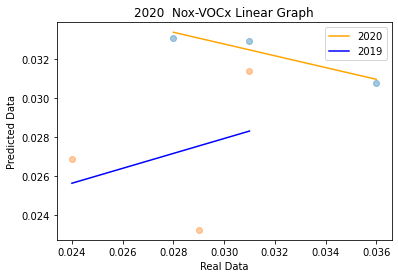

In [68]:
# 선형회귀의 결과를 시각화 그래프로 표현
# X축은 실제 데이터, Y축은 선형회귀로 예측한 데이터이다.
# 두 결과가 같다면 한 줄의 선으로 그려진다.

import matplotlib.pyplot as plt
#print(y_test.shape)
#print(np.ravel(y_test))
#print(y_predict)

flat_test = np.ravel(y_test)
flat_predict = np.ravel(y_predict)

flat_test1 = np.ravel(y1_test)
flat_predict1 = np.ravel(y1_predict)

fit_line = np.polyfit(flat_test, flat_predict, 1)
x_minmax = np.array([min(flat_test), max(flat_test)]) # x축 최소값, 최대값

fit_y = x_minmax * fit_line[0] + fit_line[1] # x축 최소, 최대값을 회귀식에 대입한 값


####
fit_line1 = np.polyfit(flat_test1, flat_predict1, 1)
x_minmax1 = np.array([min(flat_test1), max(flat_test1)]) # x축 최소값, 최대값

fit_y1 = x_minmax1 * fit_line1[0] + fit_line1[1] # x축 최소, 최대값을 회귀식에 대입한 값




#plt.plot(y_test, y_predict, color="green")
plt.scatter(y_test, y_predict, alpha=0.4)
plt.scatter(y1_test, y1_predict, alpha=0.4)
plt.plot(x_minmax, fit_y, color = 'orange')
plt.plot(x_minmax1, fit_y1, color = 'blue')
plt.legend(['2020', '2019'])
plt.xlabel("Real Data")
plt.ylabel("Predicted Data")
plt.title("2020  Nox-VOCx Linear Graph")
plt.show()